# Read Me (Introduction)

Coleeg version 5.0 (released in 1 July 2025)

<p><font color='red'>Ensure that your Google drive has sufficient space for dataset files:</font></p>
<ul>
  <li><font color='red'>Chbmit dataset: 8.4 GiB</font></li>
  <li><font color='red'>Physionet dataset: 1.9 GiB</font></li>
  <li><font color='red'>BcicomptIV2a dataset: 419.6 MiB</font></li>
</ul>



Data are stored inside ColeegData folder.

To connect to hosted (Online) runtime
* Press the arrow beside **Connect** and select **"Connect to a hosted runtime"**.

To connect to a local runtime on your machine:
* Press the arrow beside **Connect** and select **"Connect to a local runtime"**.
* Inside Coleeg folder located in your local machine home folder, run the command (bash Colab_Local)
* Copy the generated url then paste it in Colab and press connect.
* Local runtime was tested on Linux (Kubuntu 22.04)

<font color='green'>Please cite these publications if you use Coleeg in you publication:</font>
  * https://doi.org/10.1007/s11760-022-02293-1
  * https://doi.org/10.1007/s11760-022-02399-6

For support, don't hesitate to contact: malnaanah@gmail.com


# Initialization

In [1]:
%reset -f
import sys
import os
import importlib

# setting variables
coleeg_folder="Coleeg_5.0"
coleeg_data_folder="ColeegData"
time_zone='Asia/Amman'
INFO={} # dictionary for evaluation parameters and any information to be stored in info.json


# Uncomment for ubuntu 24.04 not allowing external python libraries
# !pip install  --break-system-packages --no-color mne==1.7.0 tensorflow==2.15.0 numpy==1.25.2

!pip install  --no-color mne==1.7.0 tensorflow==2.15.0 numpy==1.25.2 EMD-signal

# Fixing "mne module not found"
if not 'google.colab' in sys.modules:  # Local runtime
  os.environ['PATH'] += f":{os.environ['HOME']}/.local/bin"


# If error occures due to the used version of numpy, uncommnt the following line
# Choose cancel if a warning message appear regrading prevously imported numpy module
# After finish runining "Initialization" script, choose Runtime> Restart session.
# Then run "Initialization" script again.
#
# !pip install --no-color numpy==1.25.2



import numpy as np
from importlib import reload


# detecting if Colab or local runtime is used
if 'google.colab' in sys.modules:  # Colab runtime
  from google.colab import drive
  # mounting Google drive
  drive.mount('/gdrive')
  root_folder=f'/gdrive/MyDrive'
else: # local runtime
  root_folder= f'{os.path.expanduser("~")}'


# Importing coleeg
sys.path.append(f'{root_folder}/{coleeg_folder}/code/')
from coleeg import *
set_time_zone(time_zone)
set_data_folder(f'{root_folder}/{coleeg_data_folder}')

# helping function for reloading coleeg
def reload_coleeg():
  import coleeg
  importlib.reload(coleeg)
  globals().update(coleeg.__dict__)

# disable line breaking when printing array objects
np.set_printoptions(linewidth=np.nan)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Show information about coleeg

In [2]:
coleeg_version()

5.0


In [3]:
coleeg_info()


* Coleeg is an open source initiative for collaborating on making a piece of software for investigating the use of Neural Networks in EEG signal classification on different datasets.

* License GPL V2.0

## Team:
Mahmoud Alnaanah (malnaanah@gmail.com)
Moutz Wahdow (m.wahdow@gmail.com)


## How to install Coleeg to your google drive

  1- Download Coleeg_5.0.zip and extract it.
  2- Copy Coleeg5.0 folder to the root of your google drive.
  3- Open RunColeeg_5.0.ipynb which is inside Coleeg5.0 folder.
  4- Grant permissions for the notebook to enable its access your google drive.
  5- The data needed for Coleeg will be located in the directory ColeegData in the root of your google drive.
  6- To use Colab online, choose Connect>Connect to a hosted runtime.
  7- To use your local machine, copy Coleeg4 folder to your home (i.e. personal) folder.
  Local runtime was tested in Linux (Kubuntu 22.04)
  8- Run Colab_local script using the command (bash Colab_Local) and copy the generated url.


In [ ]:
# To view available datasets and their sampling frequencies
print(COLEEG.DATASETS)
print(COLEEG.Sample_Freqs)

# Reload Coleeg (Run after modifying coleeg module)

In [4]:
# # remounting gdrive
# drive.flush_and_unmount()
# drive.mount('/gdrive')

reload_coleeg()
set_data_folder(f'{root_folder}/{coleeg_data_folder}')
set_time_zone(time_zone)



# Loading data from original files

In [5]:
# To view available datasets and their sampling frequencies
print(COLEEG.DATASETS)
print(COLEEG.Sample_Freqs)

['physionet', 'ttk', 'bcicomptIV2a', 'chbmit']
{'physionet': 160, 'ttk': 500, 'bcicomptIV2a': 250, 'chbmit': 256}


In [6]:
# selecting dataset
INFO['dataset'] = 'chbmit'
set_content_folder(INFO['dataset'])

In [7]:
# obtaining dataset files
start_time = time.time()
unzip_dataset(INFO['dataset'])
print(f'Time = {timedelta(seconds=round(time.time() - start_time))}')


Dataset chbmit has no zip files.  Data files are downloaded automatically as needed.
Time = 0:00:00


In [ ]:
# Loading data
#====================== Options  ==============================
INFO['resample_freq'] = None # resample frequency in Hz (Set to None to deactivate)
INFO['resample_freq'] = 128 # resample frequency in Hz (Set to None to deactivate)

INFO['band_filters'] = None
# INFO['band_filters'] = [(2.0, 40.0)] # Uncomment this line to divide signals into bands
# INFO['band_filters'] = [(0.5, 8.0), (8.0, 13.0), (13.0, 40.0)] # Uncomment this line to divide signals into bands

# INFO['band_filters'] = [(0.5, 4.0), (4.0, 8.0), (8.0, 13.0), (13.0, 30.0),(30.0, 60.0)] # Uncomment this line to divide signals into bands



INFO['notch_freqs'] = None # frequency (or list of frequencies) to which a notch filter is applied, example INFO['notch_freqs'] = 50
INFO['tmin'] = 0.0
INFO['tmax'] = 2.0


# select tasks for Physionet dataset
# INFO['tasks'] = [[3,7,11],[5,9,13]] # Real movement
INFO['tasks']=[[4,8,12],[6,10,14]] # Uncommnet this line for imagined movement

# Parameters for Chbmit dataset
INFO['max_epoc'] = 30
INFO['spacing'] = 20
INFO['gap'] = INFO['max_epoc']*round(INFO['tmax']-INFO['tmin']) + INFO['spacing']


# For all datasets
# INFO['exclude'] = [6,9,12,13,14,15,21] # exclude some subjects from chbmit dataset
INFO['exclude'] = None
#=============================================================================================
# set sampling frequency
if INFO['resample_freq'] is None:
  INFO['sampling_freq'] = COLEEG.Sample_Freqs[INFO['dataset']]
else:
  INFO['sampling_freq'] = INFO['resample_freq']


start_time = time.time()

# loading data
if INFO['dataset'] == 'bcicomptIV2a':
  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning) # disable annoying error messages from python
  data_x, data_y, data_subject_index = get_data_bcicomptIV2a(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None)
elif INFO['dataset'] == 'physionet':
  data_x, data_y, data_subject_index = get_data_physionet(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Tasks=np.array(INFO['tasks']), Bands=INFO['band_filters'],  tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None, notch_freqs=INFO['notch_freqs'])
elif INFO['dataset'] == 'ttk':
  data_x, data_y, data_subject_index = get_data_ttk(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None)
elif INFO['dataset'] == 'chbmit':
  Subjects=list(range(1,25))
  data_x, data_y, data_subject_index = get_data_chbmit(Subjects=Subjects,Exclude=np.array(INFO['exclude']), resample_freq=INFO['resample_freq'], Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=INFO['tmax'], gap = INFO['gap'], max_epoc=INFO['max_epoc'], Baseline=None)
else:
  print('Wrong dataset')
INFO['bands'] = data_x.shape[-1]
print(f'\nTime = {timedelta(seconds=round(time.time() - start_time))}')


# Saving and loading data

In [ ]:
# # saving unprocessed datadata
# save_data(data_x, data_y, data_subject_index, INFO)

Data saved in folder 20250612-030025


In [ ]:
# # saving unprocessed datadata subject excluded
# INFO['exclude'] =[6,9,12,13,14,15,21]
# save_data(data_x, data_y, data_subject_index, INFO)

Data saved in folder 20250625-134318


In [ ]:
# loading unprocessed data, 128Hz, single band, subject excluded
folder='20250625-134318'
data_x, data_y, data_subject_index, INFO = load_data(folder)

In [2]:
# loading unprocessed data, 128Hz, single band
folder='20250612-030025'
data_x, data_y, data_subject_index, INFO = load_data(folder)

In [ ]:
# loading unprocessed data, 128Hz, three bands [(0.5, 8.0), (8.0, 13.0), (13.0, 40.0)]
folder='20250615-231725'
data_x, data_y, data_subject_index, INFO = load_data(folder)

In [ ]:
# # saving datadata with EMD
# INFO['transform']='EMD'
# save_data(data_x, data_y, data_subject_index, INFO)

Data saved in folder 20250612-053449


In [ ]:
# loading data with EMD
folder='20250612-053449'
data_x, data_y, data_subject_index, INFO = load_data(folder)

# Data processing

In [3]:
print(data_x.shape)

(11551, 256, 22, 1)


In [4]:
# Show number of classes for each subject
show_classes(data_subject_index,data_y)


Subject 1 [0 1 2] [168 168 168]
Subject 2 [0 1 2] [64 64 64]
Subject 3 [0 1 2] [191 191 191]
Subject 4 [0 1 2] [114 114 114]
Subject 5 [0 1 2] [150 150 150]
Subject 6 [0 1 2] [75 75 75]
Subject 7 [0 1 2] [90 90 90]
Subject 8 [0 1 2] [150 150 150]
Subject 9 [0 1 2] [120 120 120]
Subject 10 [0 1 2] [193 193 193]
Subject 11 [0 1 2] [57 57 57]
Subject 12 [0 1 2] [458 458 698]
Subject 13 [0 1 2] [208 208 253]
Subject 14 [0 1 2] [84 84 84]
Subject 15 [0 1 2] [552 552 552]
Subject 16 [0 1 2] [33 33 40]
Subject 17 [0 1 2] [90 90 90]
Subject 18 [0 1 2] [150 150 150]
Subject 19 [0 1 2] [90 90 90]
Subject 20 [0 1 2] [144 144 144]
Subject 21 [0 1 2] [89 89 89]
Subject 22 [0 1 2] [89 89 89]
Subject 23 [0 1 2] [166 166 166]
Subject 24 [0 1 2] [228 228 228]


In [ ]:
# #resampling_data
# old = INFO['resample_freq'] = 100
# new = COLEEG.Sample_Freqs[INFO['dataset']]
# data_x = resample_data(data_x,old,new)

In [5]:
# balancing data (for each subject, the number of each class is equal)
INFO['trials_max']=64  #  Options: None to disable, 'lowest' lowest number of trials, or a number if true, all subjects will have number of trials as the minimum one.
data_x, data_y, data_subject_index = balance(data_x, data_y, data_subject_index,trials_max=INFO['trials_max'])

Balancing data done.


In [6]:
# normalizing data (mean => 0, standard deviation => 1)
normalize(data_x)

Normalizing data done.


In [7]:
print(data_x.mean())
print(data_x.std())

2.7159337e-09
1.0


In [8]:
# # finding IMFs (Intrinsic Mode Functions) for Empirical Mode Decomposition (EMD)
# IMFS=5
# data_x = imfs(data_x,IMFS)
# normalize(data_x)

In [ ]:
# # finding dct
# data_x = dct_1d(data_x)

In [ ]:
# # finding fft
# data_x = fft_1d(data_x)

# Model Evaluation

In [ ]:
#====================== Options ===========================
# model_list: dictionary for models and list of epochs for training, modify according to your configuration
# Select one or more of the following models: 'Basic','CNN1D', 'EEGNet', 'ShallowConvNet', 'DeepConvNet', 'CNN2D', 'CNN3D', 'TimeDist', 'CNN1D_MFBF', 'EEGNet_fusion'
# model_list = ['Basic','CNN1D','CNN1DZ','EEGNet', 'ShallowConvNet', 'DeepConvNet','CNN2D','CNN3D', 'TimeDist']
INFO['model_list'] = ['CNN1DZ']

# INFO['fold_num'] = 5 # number of folds to divide data into, testing ratio = 1/fold_num
INFO['fold_num'] = data_subject_index.shape[0] # per-subject evaluations (align_to_subject should be True)
INFO['folds'] = range(INFO['fold_num']) # folds to include in validation, for kfold validation Folds = range(fold_num)
# INFO['folds'] = [0] # uncomment to set folds manually, helpful to do single fold when validation takes long time and colab disconnect before finishing all folds.

INFO['epochs'] = 200 # number of training epochs

INFO['align_to_subject'] = True # (True/False) align fold boundary to subjects (necessery for cross validation)
INFO['shuffle'] = True # shuffle data before dividing into folds, has no effect if align_to_subject is true
INFO['batch_size']=64
INFO['batch_norm'] = True # (True/False) Enable/Disable Batch normalization in the models: 'EEGNet', 'ShallowConvNet', 'DeepConvNet'. Notice that data already normalized
INFO['show_summary'] = False # (True/False) Show summery of the model
# INFO['verbose'] = True # (True/False) show progress for each epoch
INFO['verbose'] = False # (True/False) show progress for each epoch
INFO['dropout_rate']=0.5 # dropout rate for the models: CNN1D, CNN2D, CNN3D, TimeDist, CNN1D_MFBF
INFO['activation_name'] = 'sigmoid' # examples: 'relu', 'linear', 'tanh', 'sigmoid', 'softmax', 'selu', 'elu'
# so far 'sigmoid' gives the best results regading validation loss
INFO['play_audio'] = False # (True/False) play audio when evaluation finishes
INFO['max_norm'] = None # control kernel_constraint=max_norm(max_norm) for model: 'Basic','CNN1D', 'CNN2D', 'CNN3D', 'TimeDist', 'CNN1D_MFBF'
INFO['selected_subjects']=None # None to deactivate
# # selecting specific subjects and adjusting folds according to selected subjects
# INFO['selected_subjects']=[1,2,3,4,5,  7,8,  10, 11,   16,17,18,19,20,   22,23,24] # uncomment to select only these subjects. Notice: Numbering starts at 1
# INFO['fold_num'] = len(INFO['selected_subjects']) # per-subject evaluations (align_to_subject should be True)
# INFO['folds'] = range(INFO['fold_num']) # folds to include in validation, for kfold validation Folds = range(fold_num)

INFO['selected_classes'] = None # None to deactivate
INFO['selected_classes'] = [0,1] # uncomment to select only classes 0 and 1
INFO['selected_channels']=None # None to deactivate
INFO['selected_bands']=None
# INFO['selected_bands']=[0,1,2,3,4] # None to deactivate
#===========================================================
# if 'model' in locals():
#   del model
model = evaluate_model(data_x, data_y, data_subject_index,INFO)



# Plots

In [27]:
print(COLEEG.DATASETS)
print(COLEEG.METRICS)

['physionet', 'ttk', 'bcicomptIV2a', 'chbmit']
['training_loss', 'validation_loss', 'training_accuracy', 'validation_accuracy', 'validation_cohen_kappa', 'validation_specificity', 'validation_sensitivity']


## Line plots

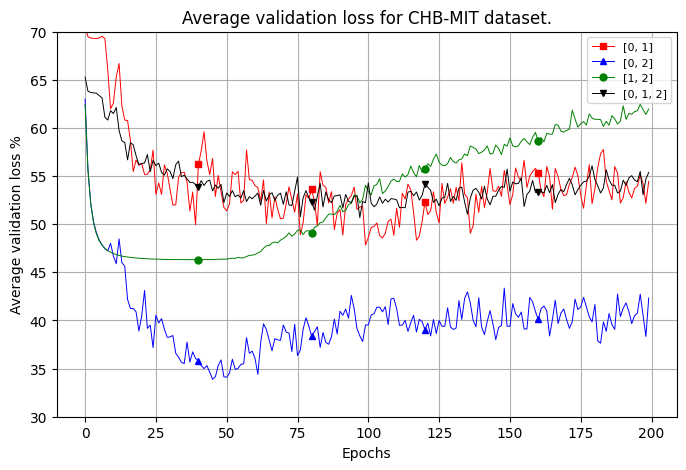

In [31]:
metrics=['validation_loss'] # example: metrics=['validation_loss','validation_accuracy']
datasets=['chbmit'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['selected_classes']
ylim=[30,70]
plot_line(datasets=datasets,metrics=metrics, ylim=ylim,save=True, label_info=label_info)

## Bar plots

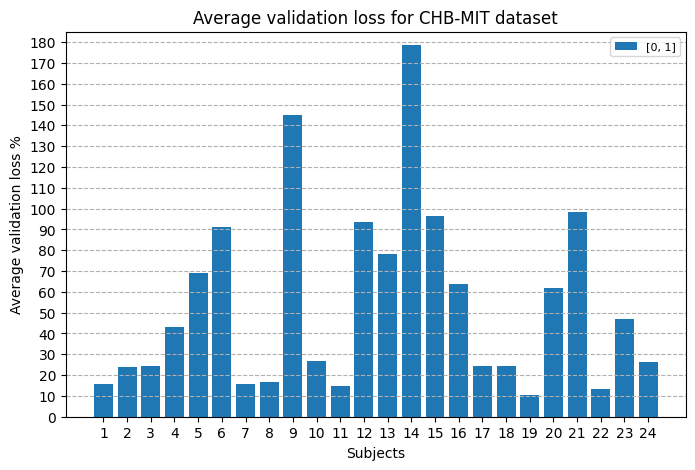

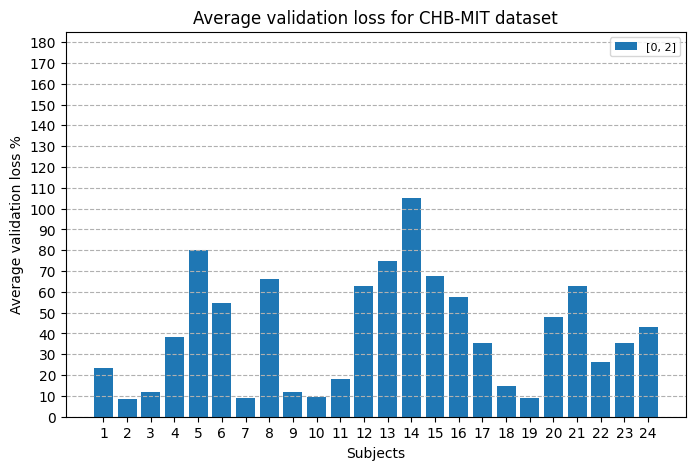

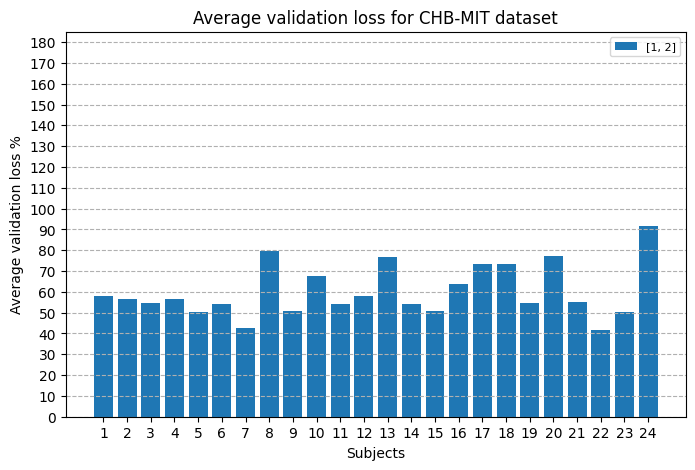

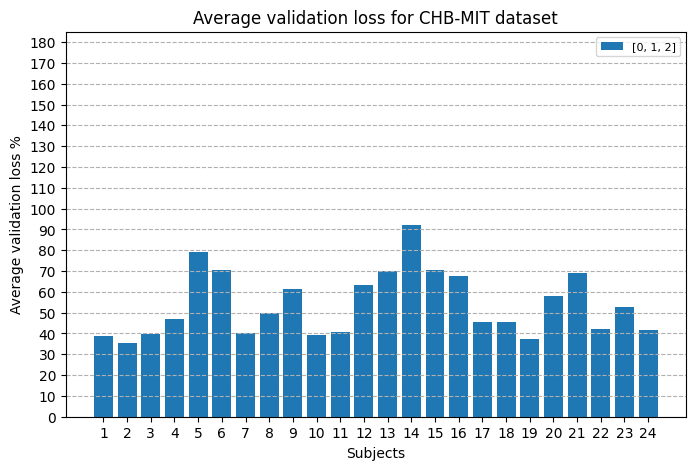

In [30]:
metrics=['validation_loss'] # example: metrics=['validation_loss','validation_accuracy']
datasets=['chbmit'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['selected_classes']
ylim = [0,185]
y_spacing=10
plot_bar(datasets=datasets,metrics=metrics,save=True,ylim=ylim,y_spacing=y_spacing, label_info=label_info)

## Multibar plots (per class testing)

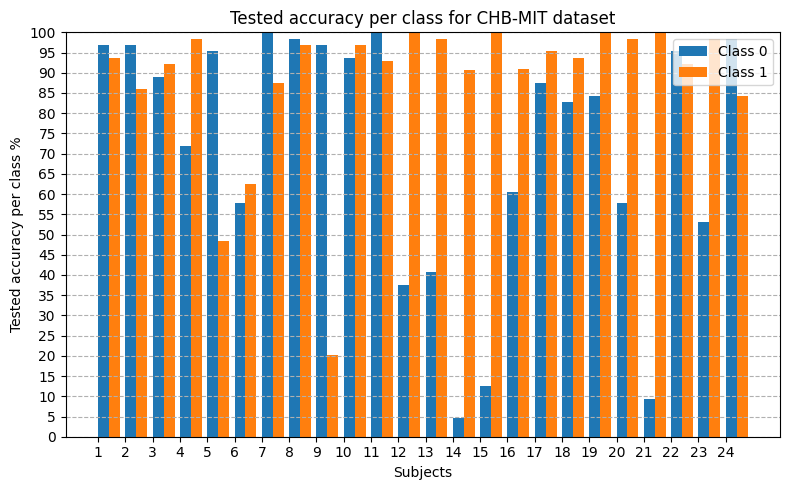

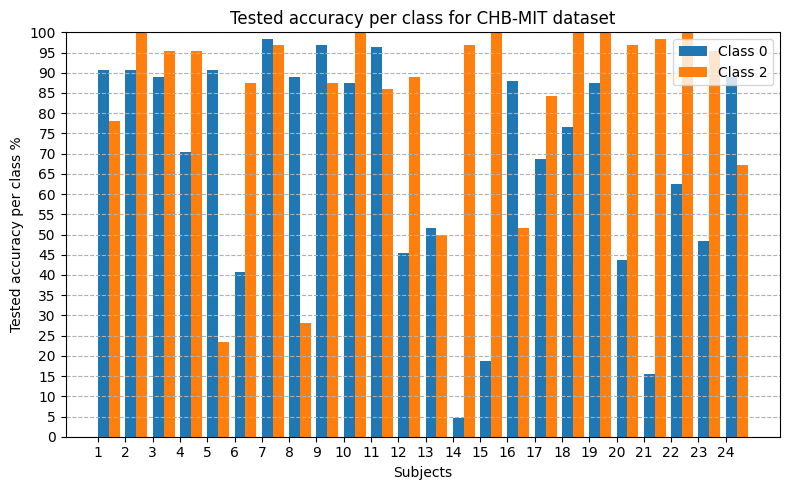

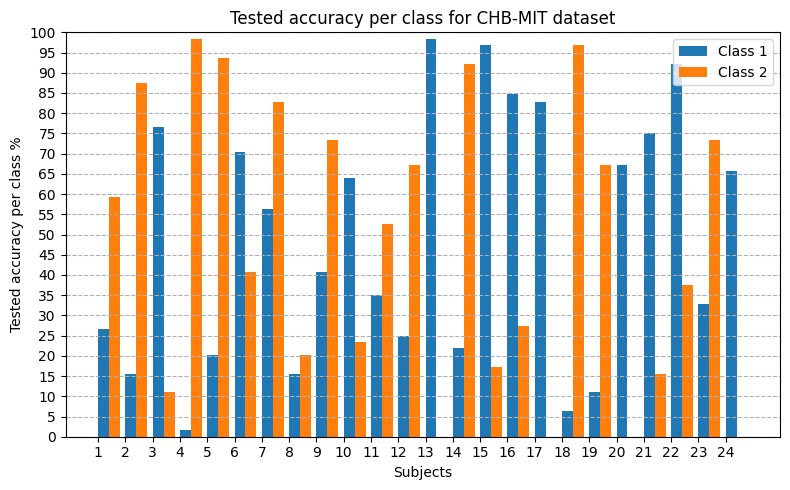

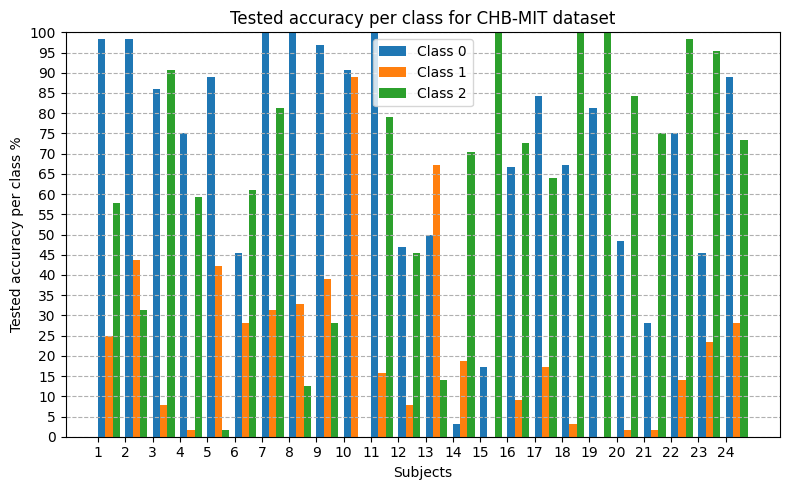

In [32]:
datasets=['chbmit'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
plot_multibar(datasets=datasets,save=True)

# Displaying class accuracy for each fold

In [33]:
# Displaying class accuracy for each fold
label_info=['model_type','selected_classses']
class_accuracy(save=False,label_info=label_info)

           chbmit          
****************************
----------------------------------------
CNN1DZ
----------------------------------------
Subjects :    1:    2:    3:    4:    5:    6:    7:    8:    9:   10:   11:   12:   13:   14:   15:   16:   17:   18:   19:   20:   21:   22:   23:   24
Average  : 95.3: 91.4: 90.6: 85.2: 71.9: 60.2: 93.8: 97.7: 58.6: 95.3: 96.5: 68.8: 69.5: 47.7: 56.2: 75.8: 91.4: 88.3: 92.2: 78.1: 54.7: 93.8: 75.8: 91.4
Class 0  : 96.9: 96.9: 89.1: 71.9: 95.3: 57.8:100.0: 98.4: 96.9: 93.8:100.0: 37.5: 40.6:  4.7: 12.5: 60.6: 87.5: 82.8: 84.4: 57.8:  9.4: 95.3: 53.1: 98.4
Class 1  : 93.8: 85.9: 92.2: 98.4: 48.4: 62.5: 87.5: 96.9: 20.3: 96.9: 93.0:100.0: 98.4: 90.6:100.0: 90.9: 95.3: 93.8:100.0: 98.4:100.0: 92.2: 98.4: 84.4
----------------------------------------
CNN1DZ
----------------------------------------
Subjects :    1:    2:    3:    4:    5:    6:    7:    8:    9:   10:   11:   12:   13:   14:   15:   16:   17:   18:   19:   20:   21:   22:   23: 

In [ ]:
fold_num = data_subject_index.shape[0] # uncomment for per-subject evaluations (align_to_subject should be True)
Folds = range(fold_num) # folds to include in validation, for kfold validation Folds = range(fold_num)

# Get average values for the last epochs

In [34]:
metrics=['validation_accuracy', 'validation_sensitivity']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['model_type','selected_classes', 'exclude']
average_results(metrics=metrics,epochs=50,save=False,label_info=label_info)

           chbmit          
****************************
-------- validation_accuracy-----------
CNN1DZ-[0, 1]-None            Mean(150-200) = 79.3
CNN1DZ-[0, 2]-None            Mean(150-200) = 76.8
CNN1DZ-[1, 2]-None            Mean(150-200) = 46.9
CNN1DZ-[0, 1, 2]-None         Mean(150-200) = 52.1
-------- validation_sensitivity-----------
CNN1DZ-[0, 1]-None            Mean(150-200) = 79.8
CNN1DZ-[0, 2]-None            Mean(150-200) = 75.8
CNN1DZ-[1, 2]-None            Mean(150-200) = 45.9
CNN1DZ-[0, 1, 2]-None         Mean(150-200) = 40.1


# Total validation time for each model from saved files

In [ ]:
label_info=['model_type','selected_classes','bands']
validation_time(save=False, label_info=label_info)

           chbmit          
****************************
CNN1DZ-[0, 1]-1                  02:52:08
CNN1DZ-[0, 2]-1                  02:32:46
CNN1DZ-[1, 2]-1                  02:33:06
CNN1DZ-[0, 1, 2]-1               03:52:22


# Visualization (video array)

In [ ]:
# Generating 2D mapped data
pos_map = get_pos_map(INFO['dataset']) # positions for 2D map conversion
data_x2D = make_into_2d(data_x,pos_map)

In [ ]:
# Generating video array for random samples
video_array(data_x2D, data_y, Class=1, Band=0, Rows=1, Cols=1)

samples = [1048]
